# Colormaps

## Why using colormaps

Some reasons to use colormaps are:

- Mimic reality (use the same set of color that appear in the physical world)
- Show classification (qualitative)
- Show value (quantitative)
- Draw attention
- Show grouping / similarities

That is why some scales are better at qualitative judgments [1] (Relative shapes and sizes). And, Other color scales are better for quantitative judgments (Looking up values).


### Types of colormaps

From the Matplotlib documentation we have the following categories:


- Sequential: change in lightness and often saturation of color incrementally, often using a single hue; should be used for representing information that has ordering.

- Diverging: change in lightness and possibly saturation of two different colors that meet in the middle at an unsaturated color; should be used when the information being plotted has a critical middle value, such as topography or when the data deviates around zero.

- Cyclic: change in lightness of two different colors that meet in the middle and beginning/end at an unsaturated color; should be used for values that wrap around at the endpoints, such as phase angle, wind direction, or time of day.

- Qualitative: often are miscellaneous colors; should be used to represent information which does not have ordering or relationships.


A really good place to check for information on what colormap to choose is [Matplotlib's documentation](https://matplotlib.org/tutorials/colors/colormaps.html#sphx-glr-tutorials-colors-colormaps-py).


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook
plt.style.use("../img/matplotlib.mplstyle")

## Testing the usefulness of some colormaps

Peter Kovesi proposed a way to compared colormaps based on a ramp with and undulation. This allows to compare global and local changes on perception at the same time. When in doubt, always compare against a grayscale colormap.

I have a whole discussion regarding cyclic colormaps on my [blog](https://nicoguaro.github.io/posts/cyclic_colormaps/).


In [3]:
def sine_ramp(y_max=1, y_min=0.0, amp=np.pi/5, cycles=50,
                     power=2, ny=50, nx=1025):
    y, x = np.mgrid[y_min:y_max:ny*1j, 0:2*np.pi:nx*1j]
    y_norm = (y - y_min)/(y_max - y_min)
    vals = amp * y_norm**power * np.sin(cycles*x) + x
    return x, y, vals

In [4]:
def circle_sine_ramp(r_max=1, r_min=0.3, amp=np.pi/5, cycles=50,
                     power=2, nr=50, ntheta=1025):
    r, t = np.mgrid[r_min:r_max:nr*1j, 0:2*np.pi:ntheta*1j]
    r_norm = (r - r_min)/(r_max - r_min)
    vals = amp * r_norm**power * np.sin(cycles*t) + t
    vals = np.mod(vals, 2*np.pi)
    return t, r, vals

<IPython.core.display.Javascript object>


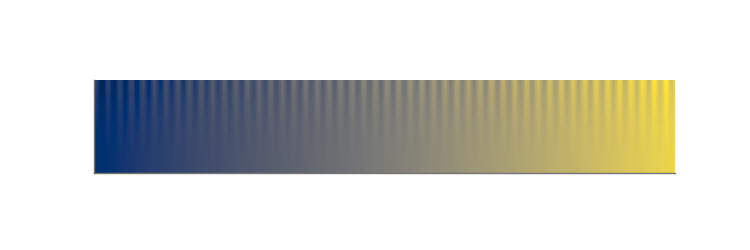

In [5]:
x, y, vals = sine_ramp()
plt.figure(figsize=(6, 2))
plt.pcolormesh(x, y, vals, cmap="cividis")
plt.axis("image")
plt.xticks([])
plt.yticks([]);

<IPython.core.display.Javascript object>


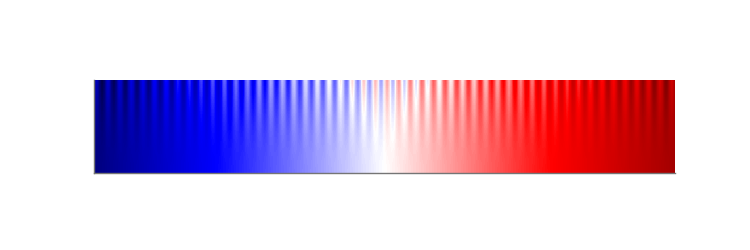

In [6]:
x, y, vals = sine_ramp()
plt.figure(figsize=(6, 2))
plt.pcolormesh(x, y, vals, cmap="seismic")
plt.axis("image")
plt.xticks([])
plt.yticks([]);

<IPython.core.display.Javascript object>


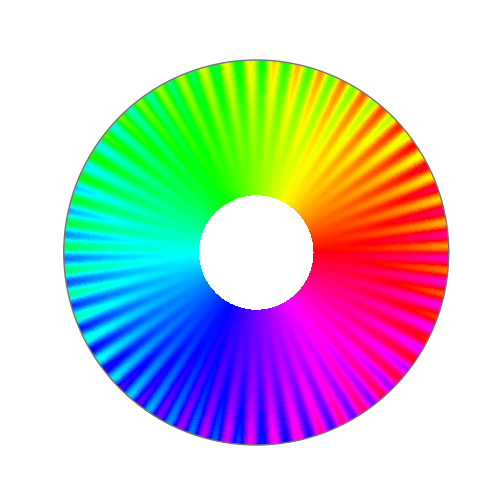

In [7]:
t, r, vals = circle_sine_ramp()
plt.figure(figsize=(4, 4))
ax = plt.subplot(111, projection="polar")
ax.pcolormesh(t, r, vals, cmap="hsv")
ax.set_xticks([])
ax.set_yticks([]);


## References

1. Ware, C., (1988). Color Sequences for Univariate Maps: Theory, Experiments and Principles. IEEE Computer Graphics and Applications. 8(5), 41-49.

2. Peter Kovesi. Good Colour Maps: How to Design Them. arXiv:1509.03700 [cs.GR] 2015

In [8]:
# This bit of code is a class added to make the title nice  (thanks to @lorenABarba )
from IPython.core.display import HTML
def css_styling():
    styles = open('./custom_barba.css', 'r').read()
    return HTML(styles)
css_styling()